In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
salary = pd.read_csv(r'C:\Users\tjbro\Desktop\Data_Science_Incubator\baseballdatabank-2019.2\baseballdatabank-2019.2\core\Salaries.csv')
players = pd.read_csv(r'C:\Users\tjbro\Desktop\Data_Science_Incubator\baseballdatabank-2019.2\baseballdatabank-2019.2\core\People.csv')
players = players[['playerID', 'nameFirst', 'nameLast']]
salary.head()
players.head()
combined = pd.merge(salary, players, on='playerID')
combined.head()

,yearID,teamID,lgID,playerID,salary,nameFirst,nameLast
0,1985,ATL,NL,barkele01,870000,Len,Barker
1,1986,ATL,NL,barkele01,880000,Len,Barker
2,1987,ATL,NL,barkele01,890000,Len,Barker
3,1987,ML4,AL,barkele01,72500,Len,Barker
4,1988,ATL,NL,barkele01,900000,Len,Barker


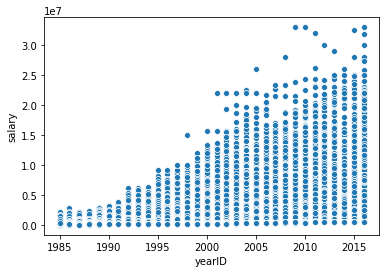

In [3]:
sns.scatterplot(x = 'yearID', y = 'salary', data = combined)


In [4]:
max_salary = combined[combined.salary > 4000000]
print(max_salary)

       yearID teamID lgID   playerID    salary nameFirst  nameLast
183      1994    CLE   AL  martide01   4500000    Dennis  Martinez
184      1995    CLE   AL  martide01   4550000    Dennis  Martinez
200      1992    NYN   NL  murraed02   4125000     Eddie    Murray
218      1993    BAL   AL  ripkeca01   5200000       Cal    Ripken
219      1994    BAL   AL  ripkeca01   5500000       Cal    Ripken
...       ...    ...  ...        ...       ...       ...       ...
25873    2014    NYA   AL  tanakma01  22000000  Masahiro    Tanaka
25874    2015    NYA   AL  tanakma01  22000000  Masahiro    Tanaka
25875    2016    NYA   AL  tanakma01  22000000  Masahiro    Tanaka
26030    2015    ARI   NL  tomasya01   5500000   Yasmany     Tomas
26031    2016    ARI   NL  tomasya01   7500000   Yasmany     Tomas

[4077 rows x 7 columns]


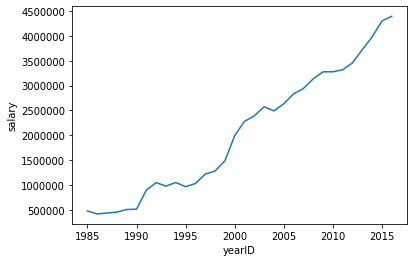

In [5]:
average_salary = combined.groupby('yearID').agg({'salary':'mean'}).reset_index()
sns.lineplot(x = 'yearID', y = 'salary', data = average_salary)

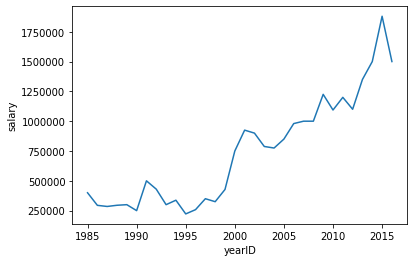

In [9]:
playerSalaries = pd.merge(players, salary, on='playerID')
median_salary = playerSalaries.groupby('yearID').agg({'salary':'median'}).reset_index()
sns.lineplot('yearID', 'salary', data=median_salary)

# Salaries vs Batting Averages

In [13]:
batting = pd.read_csv(r'C:\Users\tjbro\Desktop\Data_Science_Incubator\baseballdatabank-2019.2\baseballdatabank-2019.2\core\Batting.csv')
batting.head(10)

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0
5,armstbo01,1871,1,FW1,NaN,12,49,9,11,2,...,5.0,0.0,1.0,0,1.0,NaN,NaN,NaN,NaN,0.0
6,barkeal01,1871,1,RC1,NaN,1,4,0,1,0,...,2.0,0.0,0.0,1,0.0,NaN,NaN,NaN,NaN,0.0
7,barnero01,1871,1,BS1,NaN,31,157,66,63,10,...,34.0,11.0,6.0,13,1.0,NaN,NaN,NaN,NaN,1.0
8,barrebi01,1871,1,FW1,NaN,1,5,1,1,1,...,1.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
9,barrofr01,1871,1,BS1,NaN,18,86,13,13,2,...,11.0,1.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0


In [14]:
batting['avg'] = batting.H / batting.AB
playerDetail = pd.merge(playerSalaries, batting, how='outer')

**Removing** all players with less than ten ABs in the season


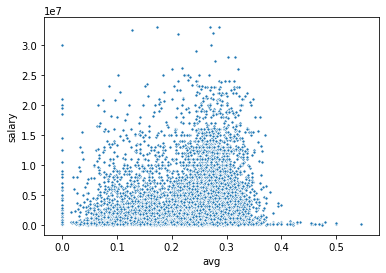

In [15]:
playerSubset = playerDetail[playerDetail.AB > 9]
sns.scatterplot(x='avg', y='salary', data=playerSubset, s=10)

D:\Spyder\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


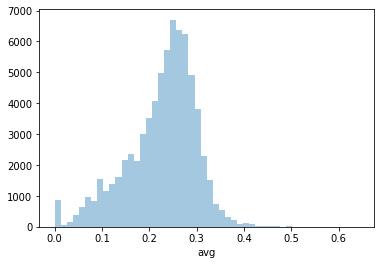

In [16]:
playerDetail[playerDetail.salary > 25000000][playerDetail.avg == 0]
sns.distplot(playerSubset.avg, kde=False)

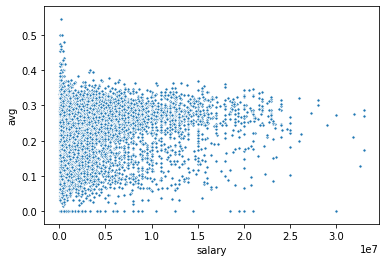

In [17]:
sns.scatterplot(x='salary', y='avg', data=playerSubset, s=10)

In [18]:
playerDetail.salary.dropna()
playerDetail['simpleSalary'] = (playerDetail.salary / 10000000).round(1)
playerDetail.head()

,playerID,nameFirst,nameLast,yearID,teamID,lgID,salary,stint,G,AB,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,avg,simpleSalary
0,aardsda01,David,Aardsma,2004,SFN,NL,300000.0,1.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
1,aardsda01,David,Aardsma,2007,CHA,AL,387500.0,1.0,25.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
2,aardsda01,David,Aardsma,2008,BOS,AL,403250.0,1.0,47.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,aardsda01,David,Aardsma,2009,SEA,AL,419000.0,1.0,73.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
4,aardsda01,David,Aardsma,2010,SEA,AL,2750000.0,1.0,53.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.3


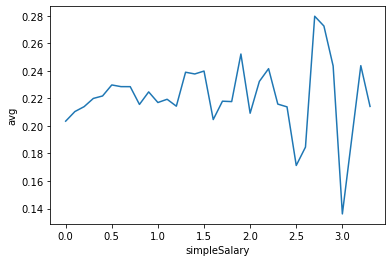

In [19]:
average_batting_salary = playerDetail.groupby('simpleSalary').agg({'avg':'mean'}).reset_index()
sns.lineplot('simpleSalary', 'avg', data=average_batting_salary)

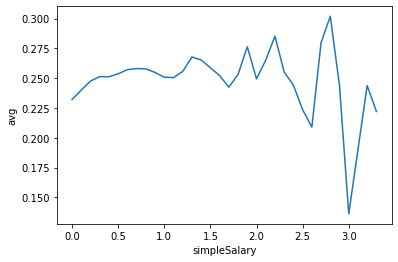

In [20]:
median_batting_salary = playerDetail.groupby('simpleSalary').agg({'avg':'median'}).reset_index()
sns.lineplot('simpleSalary', 'avg', data=median_batting_salary)

# Pitching vs Salary

In [22]:
pitching = pd.read_csv(r'C:\Users\tjbro\Desktop\Data_Science_Incubator\baseballdatabank-2019.2\baseballdatabank-2019.2\core\Pitching.csv')
pitching.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,NaN,7,NaN,0,146.0,0,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,NaN,7,NaN,0,1291.0,0,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,NaN,2,NaN,0,14.0,0,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,NaN,20,NaN,0,1080.0,1,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,NaN,0,NaN,0,57.0,0,21,NaN,NaN,NaN


In [23]:
pitchingDetail = pd.merge(playerSalaries, pitching, how='outer')
pitchingDetail.head()

,playerID,nameFirst,nameLast,yearID,teamID,lgID,salary,stint,W,L,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,aardsda01,David,Aardsma,2004,SFN,NL,300000.0,1.0,1.0,0.0,...,0.0,0.0,2.0,0.0,61.0,5.0,8.0,0.0,1.0,1.0
1,aardsda01,David,Aardsma,2007,CHA,AL,387500.0,1.0,2.0,1.0,...,3.0,2.0,1.0,0.0,151.0,7.0,24.0,2.0,1.0,1.0
2,aardsda01,David,Aardsma,2008,BOS,AL,403250.0,1.0,4.0,2.0,...,2.0,3.0,5.0,0.0,228.0,7.0,32.0,3.0,2.0,4.0
3,aardsda01,David,Aardsma,2009,SEA,AL,419000.0,1.0,3.0,6.0,...,3.0,2.0,0.0,0.0,296.0,53.0,23.0,2.0,1.0,2.0
4,aardsda01,David,Aardsma,2010,SEA,AL,2750000.0,1.0,0.0,6.0,...,5.0,2.0,2.0,0.0,202.0,43.0,19.0,7.0,1.0,5.0


In [24]:
pitchingDetail = pitchingDetail[['playerID', 'nameFirst', 'nameLast', 'yearID', 'salary', 'G', 'BAOpp', 'SO']]
pitchingDetail.head()

,playerID,nameFirst,nameLast,yearID,salary,G,BAOpp,SO
0,aardsda01,David,Aardsma,2004,300000.0,11.0,0.417,5.0
1,aardsda01,David,Aardsma,2007,387500.0,25.0,0.300,36.0
2,aardsda01,David,Aardsma,2008,403250.0,47.0,0.268,49.0
3,aardsda01,David,Aardsma,2009,419000.0,73.0,0.190,80.0
4,aardsda01,David,Aardsma,2010,2750000.0,53.0,0.198,49.0


In [25]:
pitchingDetail = pitchingDetail.dropna()
pitchingDetail.head()

,playerID,nameFirst,nameLast,yearID,salary,G,BAOpp,SO
0,aardsda01,David,Aardsma,2004,300000.0,11.0,0.417,5.0
1,aardsda01,David,Aardsma,2007,387500.0,25.0,0.300,36.0
2,aardsda01,David,Aardsma,2008,403250.0,47.0,0.268,49.0
3,aardsda01,David,Aardsma,2009,419000.0,73.0,0.190,80.0
4,aardsda01,David,Aardsma,2010,2750000.0,53.0,0.198,49.0


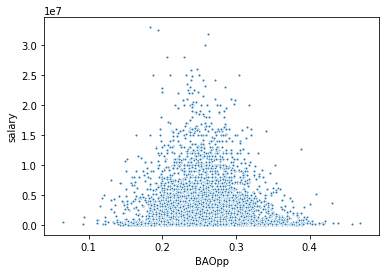

In [26]:
pitchingDetail = pitchingDetail[pitchingDetail.G > 9]
sns.scatterplot(x='BAOpp', y='salary', data=pitchingDetail, s=8)

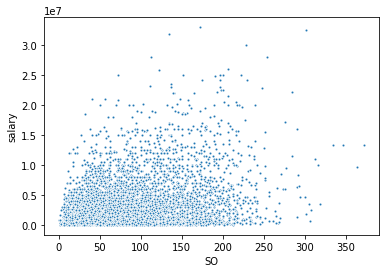

In [27]:
sns.scatterplot(x='SO', y='salary', data=pitchingDetail, s=8)

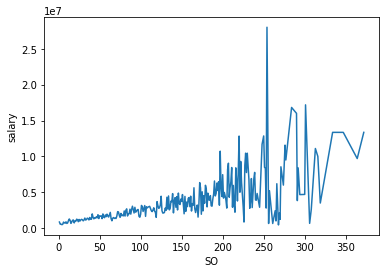

In [28]:
average_pitching_salary = pitchingDetail.groupby('SO').agg({'salary':'mean'}).reset_index()
sns.lineplot('SO', 'salary', data=average_pitching_salary)

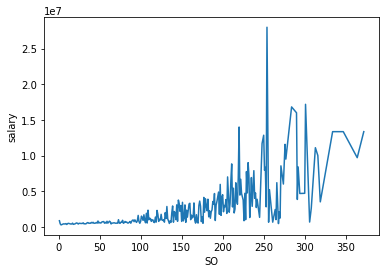

In [29]:
median_pitching_salary = pitchingDetail.groupby('SO').agg({'salary':'median'}).reset_index()
sns.lineplot('SO', 'salary', data=median_pitching_salary)

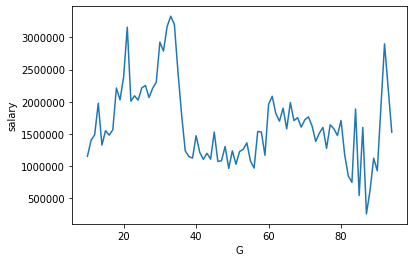

In [30]:
average_pitching_salary_G = pitchingDetail.groupby('G').agg({'salary':'mean'}).reset_index()
sns.lineplot('G', 'salary', data=average_pitching_salary_G)

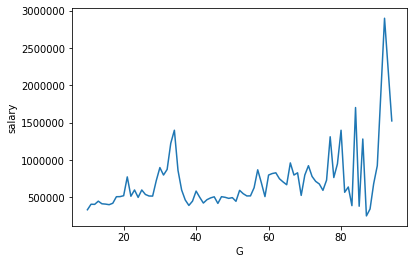

In [31]:
median_pitching_salary_G = pitchingDetail.groupby('G').agg({'salary':'median'}).reset_index()
sns.lineplot('G', 'salary', data=median_pitching_salary_G)

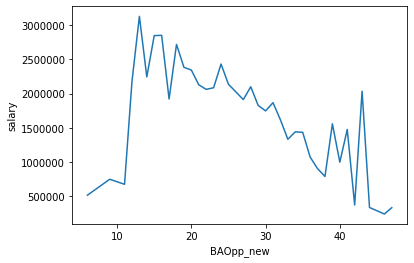

In [32]:
pitchingDetail['BAOpp_new'] = (pitchingDetail.BAOpp * 100).round(0).astype(int)
mean_pitching_salary_BAOpp = pitchingDetail.groupby('BAOpp_new').agg({'salary':'mean'}).reset_index()
sns.lineplot('BAOpp_new', 'salary', data=mean_pitching_salary_BAOpp)

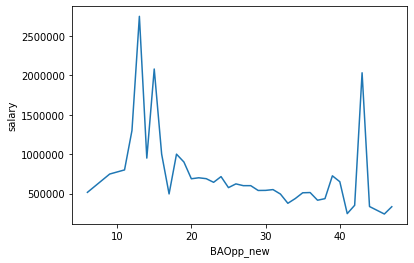

In [33]:
median_pitching_salary_BAOpp = pitchingDetail.groupby('BAOpp_new').agg({'salary':'median'}).reset_index()
sns.lineplot('BAOpp_new', 'salary', data=median_pitching_salary_BAOpp)